In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
from numpy.random import seed
seed(123)
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import seaborn as sns
import geopandas as gpd
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import explained_variance_score, mean_squared_error, r2_score
import time
from keras import models, layers, optimizers, regularizers
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
from statsmodels.tsa.seasonal import seasonal_decompose

Using TensorFlow backend.


In [2]:
raw_df = pd.read_csv('/media/development-pc/177C2183592BCCE5/AIRNBNB/listings.csv')
print(f"The dataset contains {len(raw_df)} Airbnb listings")
pd.set_option('display.max_columns', len(raw_df.columns)) # To view all columns
pd.set_option('display.max_rows', 100)
raw_df.head(3)

The dataset contains 11541 Airbnb listings


/home/development-pc/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (61,62) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,10595,https://www.airbnb.com/rooms/10595,20200317175934,2020-03-18,"96m2, 3BR, 2BA, Metro, WI-FI etc...",Athens Furnished Apartment No6 is 3-bedroom ap...,Athens Furnished Apartment No6 is an excellent...,Athens Furnished Apartment No6 is 3-bedroom ap...,none,Ampelokipi district is nice multinational and ...,Although is very easy to come from the airport...,Note: 5-day ticket for all the public transpor...,Guest have access to all amenities in the apar...,-Our reception is 10 meters away from the entr...,"- Parties, meetings, appointments or invite pe...",NaN,NaN,https://a0.muscache.com/im/pictures/f7e19a44-5...,NaN,37177,https://www.airbnb.com/users/show/37177,Emmanouil,2009-09-08,"Athens, Attica, Greece",Athens Quality Apartments is a company started...,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/859c1...,https://a0.muscache.com/im/pictures/user/859c1...,Ambelokipi,6,6,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Athens, Attica, Greece",Ambelokipi,ΑΜΠΕΛΟΚΗΠΟΙ,NaN,Athens,Attica,11526,Athens,"Athens, Greece",GR,Greece,37.98863,23.76527,t,Apartment,Entire home/apt,8,2.0,3.0,5.0,Real Bed,"{TV,""Cable TV"",Internet,Wifi,""Air conditioning...",1076.0,$104.00,$700.00,"$2,800.00",$0.00,$25.00,4,$12.00,1,45,1,4,45,45,1.4,45.0,today,t,24,54,84,357,2020-03-18,24,7,2011-05-20,2020-02-07,97.0,10.0,10.0,10.0,10.0,9.0,10.0,t,478825,NaN,t,f,moderate,f,f,6,6,0,0,0.22
1,10990,https://www.airbnb.com/rooms/10990,20200317175934,2020-03-18,Athens Quality Apartments - Deluxe Apartment,Athens Quality Apartments - Deluxe apartment i...,Athens Furnished Apartment No3 is an excellent...,Athens Quality Apartments - Deluxe apartment i...,none,Ampelokipi district is nice multinational and ...,NaN,Note: 5-day ticket for all the public transpor...,NaN,NaN,"- Parties, meetings, appointments or invite pe...",NaN,NaN,https://a0.muscache.com/im/pictures/8645179/c1...,NaN,37177,https://www.airbnb.com/users/show/37177,Emmanouil,2009-09-08,"Athens, Attica, Greece",Athens Quality Apartments is a company started...,within an hour,100%,100%,t,https://a0.muscache.com/im/pictures/user/859c1...,https://a0.muscache.com/im/pictures/user/859c1...,Ambelokipi,6,6,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Athens, Attica

In [3]:
cols_to_drop = ['listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_location', 'host_about', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_verifications', 'calendar_last_scraped']
df = raw_df.drop(cols_to_drop, axis=1)

In [4]:
df.isna().sum()


id                                                  0
experiences_offered                                 0
host_since                                          0
host_response_time                               2207
host_response_rate                               2207
host_acceptance_rate                             1451
host_is_superhost                                   0
host_listings_count                                 0
host_total_listings_count                           0
host_has_profile_pic                                0
host_identity_verified                              0
street                                              0
neighbourhood                                       1
neighbourhood_cleansed                              0
neighbourhood_group_cleansed                    11541
city                                                6
state                                           10447
zipcode                                           268
market                      

In [5]:
df.drop(['host_acceptance_rate', 'neighbourhood_group_cleansed','weekly_price', 'monthly_price', 'license', 'jurisdiction_names'], axis=1, inplace=True)

df.set_index('id', inplace=True)

In [6]:

print(sum((df.host_listings_count == df.host_total_listings_count) == False))
df.loc[((df.host_listings_count == df.host_total_listings_count) == False)][:5]

0


,experiences_offered,host_since,host_response_time,host_response_rate,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


In [7]:
df.drop(['host_total_listings_count', 'calculated_host_listings_count', 'calculated_host_listings_count_entire_homes', 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms'], axis=1, inplace=True)

In [8]:
lat_long = df[['latitude', 'longitude']]

In [9]:
df.drop(['zipcode', 'latitude', 'longitude', 'street', 'neighbourhood', 'city', 'state', 'market', 'smart_location', 'country_code', 'country', 'is_location_exact'], axis=1, inplace=True)

In [10]:
sum((df.minimum_nights == df.minimum_minimum_nights) == False)


491

In [11]:
df.drop(['minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm'], axis=1, inplace=True)

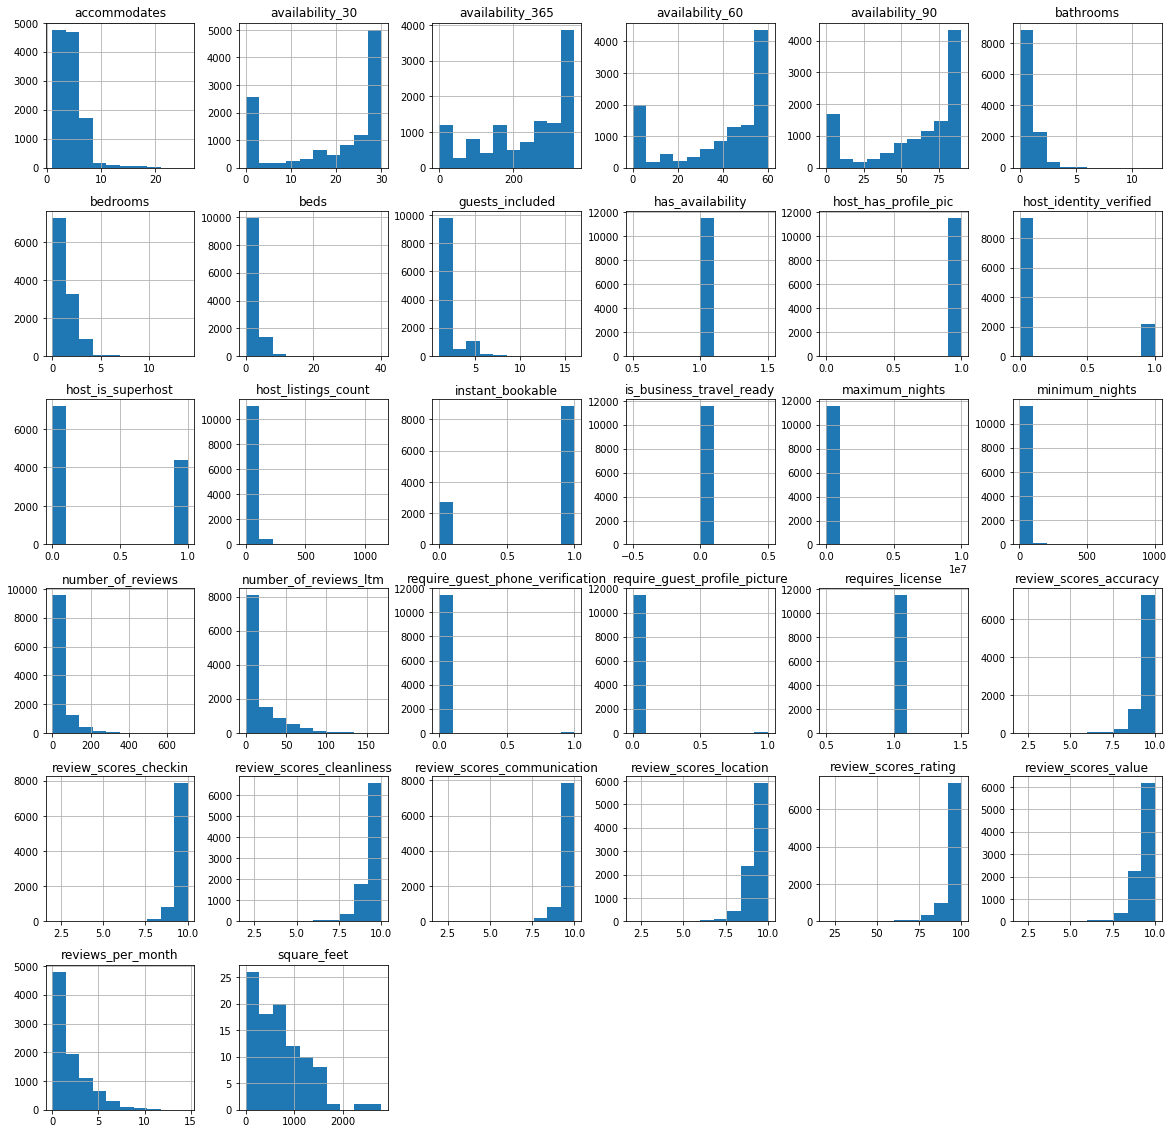

In [12]:
# Replacing columns with f/t with 0/1
df.replace({'f': 0, 't': 1}, inplace=True)

# Plotting the distribution of numerical and boolean categories
df.hist(figsize=(20,20));

In [14]:
df.drop(['has_availability', 'host_has_profile_pic', 'is_business_travel_ready', 'require_guest_phone_verification', 'require_guest_profile_picture', 'requires_license'], axis=1, inplace=True)

In [15]:
df.experiences_offered.value_counts()


none    11541
Name: experiences_offered, dtype: int64

In [16]:
df.drop('experiences_offered', axis=1, inplace=True)

In [17]:
# Converting to datetime
df.host_since = pd.to_datetime(df.host_since) 

# Calculating the number of days
df['host_days_active'] = (datetime(2019, 4, 9) - df.host_since).astype('timedelta64[D]')

# Printing mean and median
print("Mean days as host:", round(df['host_days_active'].mean(),0))
print("Median days as host:", df['host_days_active'].median())

# Replacing null values with the median
df.host_days_active.fillna(df.host_days_active.median(), inplace=True)

Mean days as host: 888.0
Median days as host: 762.0


In [18]:
print("Null values:", df.host_response_time.isna().sum())
print(f"Proportion: {round((df.host_response_time.isna().sum()/len(df))*100, 1)}%")

# Number of rows without a value for host_response_time which have also not yet had a review
len(df[df.loc[ :,['host_response_time ', 'first_review'] ].isnull().sum(axis=1) == 2])

Null values: 2207
Proportion: 19.1%


KeyError: 'Passing list-likes to .loc or [] with any missing labels is no longer supported, see https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike'

In [19]:
df.host_response_time.fillna("unknown", inplace=True)
df.host_response_time.value_counts(normalize=True)

within an hour        0.667533
unknown               0.191231
within a few hours    0.075297
within a day          0.047570
a few days or more    0.018369
Name: host_response_time, dtype: float64

In [20]:
df.host_response_time.value_counts(normalize=True)


within an hour        0.667533
unknown               0.191231
within a few hours    0.075297
within a day          0.047570
a few days or more    0.018369
Name: host_response_time, dtype: float64

In [21]:
print("Null values:", df.host_response_rate.isna().sum())
print(f"Proportion: {round((df.host_response_rate.isna().sum()/len(df))*100, 1)}%")


Null values: 2207
Proportion: 19.1%


In [22]:
# Removing the % sign from the host_response_rate string and converting to an integer
df.host_response_rate = df.host_response_rate.str[:-1].astype('float64')

print("Mean host response rate:", round(df['host_response_rate'].mean(),0))
print("Median host response rate:", df['host_response_rate'].median())
print(f"Proportion of 100% host response rates: {round(((df.host_response_rate == 100.0).sum()/df.host_response_rate.count())*100,1)}%")

Mean host response rate: 96.0
Median host response rate: 100.0
Proportion of 100% host response rates: 82.5%


In [23]:
df.host_response_rate = pd.cut(df.host_response_rate, bins=[0, 50, 90, 99, 100], labels=['0-49%', '50-89%', '90-99%', '100%'], include_lowest=True)

# Converting to string
df.host_response_rate = df.host_response_rate.astype('str')

# Replace nulls with 'unknown'
df.host_response_rate.replace('nan', 'unknown', inplace=True)

# Category counts
df.host_response_rate.value_counts()

100%       7696
unknown    2207
90-99%      754
50-89%      601
0-49%       283
Name: host_response_rate, dtype: int64

In [32]:

# Number of rows without a value for multiple host-related columns
len(df[df.loc[ :,['host_since ', 'host_is_superhost', 'host_listings_count', 'host_has_profile_pic', 'host_identity_verified'] ].isnull().sum(axis=1) == 5])

KeyError: 'Passing list-likes to .loc or [] with any missing labels is no longer supported, see https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike'

In [33]:
df.dropna(subset=['host_since'], inplace=True)


In [34]:
df.property_type.value_counts()


Apartment                  9911
House                       396
Condominium                 272
Loft                        182
Serviced apartment          180
Hotel                       134
Aparthotel                  126
Boutique hotel              118
Bed and breakfast            42
Hostel                       38
Townhouse                    32
Guest suite                  27
Villa                        19
Other                        16
Guesthouse                   11
Earth house                   9
Tiny house                    7
Cycladic house (Greece)       4
Camper/RV                     4
Boat                          3
Resort                        3
Cottage                       3
Bungalow                      1
Cave                          1
In-law                        1
Farm stay                     1
Name: property_type, dtype: int64

In [35]:
# Replacing categories that are types of houses or apartments
df.property_type.replace({
    'Townhouse': 'House',
    'Serviced apartment': 'Apartment',
    'Loft': 'Apartment',
    'Bungalow': 'House',
    'Cottage': 'House',
    'Villa': 'House',
    'Tiny house': 'House',
    'Earth house': 'House',
    'Chalet': 'House'  
    }, inplace=True)

# Replacing other categories with 'other'
df.loc[~df.property_type.isin(['House', 'Apartment']), 'property_type'] = 'Other'

In [36]:

for col in ['bathrooms', 'bedrooms', 'beds']:
    df[col].fillna(df[col].median(), inplace=True)

In [37]:
df.bed_type.value_counts()


Real Bed         11458
Pull-out Sofa       70
Futon                6
Couch                5
Airbed               2
Name: bed_type, dtype: int64

In [38]:
df.drop('bed_type', axis=1, inplace=True)


In [39]:
df.amenities[:1].values

array(['{TV,"Cable TV",Internet,Wifi,"Air conditioning",Kitchen,"Buzzer/wireless intercom",Heating,"Family/kid friendly",Washer,Dryer,"Safety card",Essentials,Shampoo,"24-hour check-in",Hangers,"Hair dryer",Iron,"Laptop friendly workspace","Private living room","High chair",Crib,"Hot water","Bed linens","Extra pillows and blankets","Ethernet connection",Microwave,"Coffee maker",Refrigerator,Dishwasher,"Dishes and silverware","Cooking basics",Oven,Stove,"Single level home","Patio or balcony","Luggage dropoff allowed","Host greets you"}'],
      dtype=object)

In [40]:
amenities_list = list(df.amenities)
amenities_list_string = " ".join(amenities_list)
amenities_list_string = amenities_list_string.replace('{', '')
amenities_list_string = amenities_list_string.replace('}', ',')
amenities_list_string = amenities_list_string.replace('"', '')
amenities_set = [x.strip() for x in amenities_list_string.split(',')]
amenities_set = set(amenities_set)
amenities_set

{'',
 '24-hour check-in',
 'Accessible-height bed',
 'Accessible-height toilet',
 'Air conditioning',
 'Air purifier',
 'Alfresco bathtub',
 'Amazon Echo',
 'BBQ grill',
 'Baby bath',
 'Baby monitor',
 'Babysitter recommendations',
 'Baking sheet',
 'Balcony',
 'Barbecue utensils',
 'Bath towel',
 'Bathroom essentials',
 'Bathtub',
 'Bathtub with bath chair',
 'Beach essentials',
 'Beach view',
 'Beachfront',
 'Bed linens',
 'Bedroom comforts',
 'Bidet',
 'Body soap',
 'Bread maker',
 'Breakfast',
 'Breakfast table',
 'Building staff',
 'Buzzer/wireless intercom',
 'Cable TV',
 'Carbon monoxide detector',
 'Cat(s)',
 'Ceiling fan',
 'Central air conditioning',
 'Changing table',
 'Children’s books and toys',
 'Children’s dinnerware',
 'Cleaning before checkout',
 'Coffee maker',
 'Convection oven',
 'Cooking basics',
 'Crib',
 'DVD player',
 'Day bed',
 'Desk',
 'Disabled parking spot',
 'Dishes and silverware',
 'Dishwasher',
 'Dog(s)',
 'Doorman',
 'Double oven',
 'Dryer',
 'EV charg

In [41]:
desirable_amenities = [
 'Cable TV',
 'Ceiling fan',
 'Central air conditioning',
 'Coffee maker',
 'Cooking basics',
 'Dishes and silverware',
 'Dishwasher',
 'Dog(s)',
 'Dryer',
 'Elevator',
 'Essentials',
 'Extra pillows and blankets',
 'Extra space around bed',
 'Family/kid friendly',
 'First aid kit',
 'Free parking on premises',
 'Free street parking',
 'Freezer',
 'Full kitchen',
 'Game console',
 'Garden or backyard',
 'Gym',
 'Hair dryer',
 'Heating',
 'High-resolution computer monitor',
 'Host greets you',
 'Hot water',
 'Indoor fireplace',
 'Internet',
 'Iron',
 'Kitchen',
 'Long term stays allowed',
 'Microwave',
 'Mini fridge',
 'Mountain view',
 'Netflix',
 'Other pet(s)',
 'Outdoor parking',
 'Oven',
 'Pets allowed',
 'Pool',
 'Private bathroom',
 'Private entrance',
 'Private living room',
 'Private pool',
 'Satellite TV',
 'Refrigerator',
 'Shared gym',
 'Shared pool',
 'Smart TV',
 'Smoking allowed',
 'Suitable for events',
 'TV',
 'Table corner guards',
 'Washer/Dryer',
 'Wifi',
 'Window guards']

In [42]:
for x in desirable_amenities:
    df.loc[df['amenities'].str.contains(x), x] = 1


/home/development-pc/anaconda3/lib/python3.7/site-packages/pandas/core/strings.py:1952: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [43]:

# Replacing nulls with zeros for new columns
cols_to_replace_nulls = df.iloc[:,41:].columns
df[cols_to_replace_nulls] = df[cols_to_replace_nulls].fillna(0)

# Produces a list of amenity features where one category (true or false) contains fewer than 10% of listings
infrequent_amenities = []
for col in df.iloc[:,41:].columns:
    if df[col].sum() < len(df)/10:
        infrequent_amenities.append(col)
print(infrequent_amenities)

# Dropping infrequent amenity features
df.drop(infrequent_amenities, axis=1, inplace=True)

# Dropping the original amenity feature
df.drop('amenities', axis=1, inplace=True)

['Ceiling fan', 'Central air conditioning', 'Dog(s)', 'Extra space around bed', 'Free parking on premises', 'Freezer', 'Full kitchen', 'Game console', 'Garden or backyard', 'Gym', 'High-resolution computer monitor', 'Indoor fireplace', 'Mini fridge', 'Mountain view', 'Netflix', 'Other pet(s)', 'Outdoor parking', 'Pool', 'Private bathroom', 'Private pool', 'Satellite TV', 'Shared gym', 'Shared pool', 'Smart TV', 'Suitable for events', 'Table corner guards', 'Washer/Dryer', 'Window guards']


In [44]:
df.columns[40:]


Index(['host_days_active', 'Cable TV', 'Coffee maker', 'Cooking basics',
       'Dishes and silverware', 'Dishwasher', 'Dryer', 'Elevator',
       'Essentials', 'Extra pillows and blankets', 'Family/kid friendly',
       'First aid kit', 'Free street parking', 'Hair dryer', 'Heating',
       'Host greets you', 'Hot water', 'Internet', 'Iron', 'Kitchen',
       'Long term stays allowed', 'Microwave', 'Oven', 'Pets allowed',
       'Private entrance', 'Private living room', 'Refrigerator',
       'Smoking allowed', 'TV', 'Wifi'],
      dtype='object')

In [45]:
df.price = df.price.str[1:-3]
df.price = df.price.str.replace(",", "")
df.price = df.price.astype('int64')

In [46]:
df.security_deposit.isna().sum()


2963

In [47]:
df.security_deposit = df.security_deposit.str[1:-3]
df.security_deposit = df.security_deposit.str.replace(",", "")
df.security_deposit.fillna(0, inplace=True)
df.security_deposit = df.security_deposit.astype('int64')

In [48]:
df.cleaning_fee.isna().sum()

1813

In [49]:
df.cleaning_fee = df.cleaning_fee.str[1:-3]
df.cleaning_fee = df.cleaning_fee.str.replace(",", "")
df.cleaning_fee.fillna(0, inplace=True)
df.cleaning_fee = df.cleaning_fee.astype('int64')

In [50]:
df.extra_people = df.extra_people.str[1:-3]
df.extra_people = df.extra_people.str.replace(",", "")
df.extra_people.fillna(0, inplace=True)
df.extra_people = df.extra_people.astype('int64')

In [51]:
print("Number of categories:", df.calendar_updated.nunique())
print("\nTop five categories:")
df.calendar_updated.value_counts()[:5]

Number of categories: 77

Top five categories:


today           1820
a week ago      1081
2 weeks ago      963
3 weeks ago      630
2 months ago     625
Name: calendar_updated, dtype: int64

In [52]:
df.drop('calendar_updated', axis=1, inplace=True)

In [53]:
df.drop(['availability_30', 'availability_60', 'availability_365'], axis=1, inplace=True)

In [54]:
print(f"Null values in 'first_review': {round(100*df.first_review.isna().sum()/len(df),1)}%")
print(f"Null values in 'review_scores_rating': {round(100*df.review_scores_rating .isna().sum()/len(df),1)}%")

Null values in 'first_review': 22.2%
Null values in 'review_scores_rating': 22.7%


In [55]:
df.first_review = pd.to_datetime(df.first_review) # Converting to datetime

# Calculating the number of days between the first review and the date the data was scraped
df['time_since_first_review'] = (datetime(2019, 4, 9) - df.first_review).astype('timedelta64[D]')

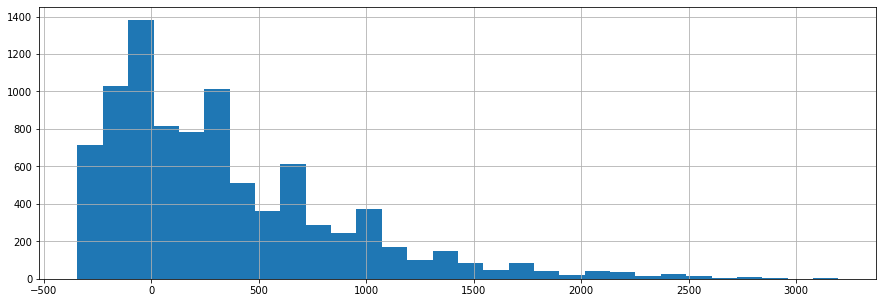

In [56]:
df.time_since_first_review.hist(figsize=(15,5), bins=30);


In [57]:
def bin_column(col, bins, labels, na_label='unknown'):
    """
    Takes in a column name, bin cut points and labels, replaces the original column with a
    binned version, and replaces nulls (with 'unknown' if unspecified).
    """
    df[col] = pd.cut(df[col], bins=bins, labels=labels, include_lowest=True)
    df[col] = df[col].astype('str')
    df[col].fillna(na_label, inplace=True)

In [58]:
# Binning time since first review
bin_column('time_since_first_review',
           bins=[0, 182, 365, 730, 1460, max(df.time_since_first_review)],
           labels=['0-6 months',
                   '6-12 months',
                   '1-2 years',
                   '2-3 years',
                   '4+ years'],
           na_label='no reviews')

In [59]:
df.last_review = pd.to_datetime(df.last_review) # Converting to datetime

# Calculating the number of days between the most recent review and the date the data was scraped
df['time_since_last_review'] = (datetime(2019, 4, 9) - df.last_review).astype('timedelta64[D]')

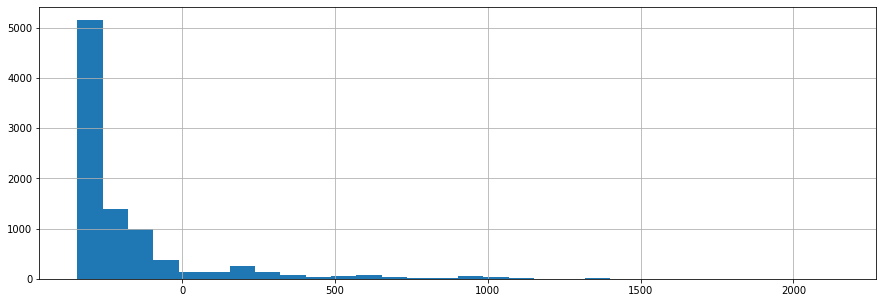

In [60]:
# Distribution of the number of days since last review
df.time_since_last_review.hist(figsize=(15,5), bins=30);

In [61]:
# Binning time since last review
bin_column('time_since_last_review',
           bins=[0, 14, 60, 182, 365, max(df.time_since_last_review)],
           labels=['0-2 weeks',
                   '2-8 weeks',
                   '2-6 months',
                   '6-12 months',
                   '1+ year'],
           na_label='no reviews')

In [62]:
# Dropping last_review - first_review will be kept for EDA and dropped later
df.drop('last_review', axis=1, inplace=True)

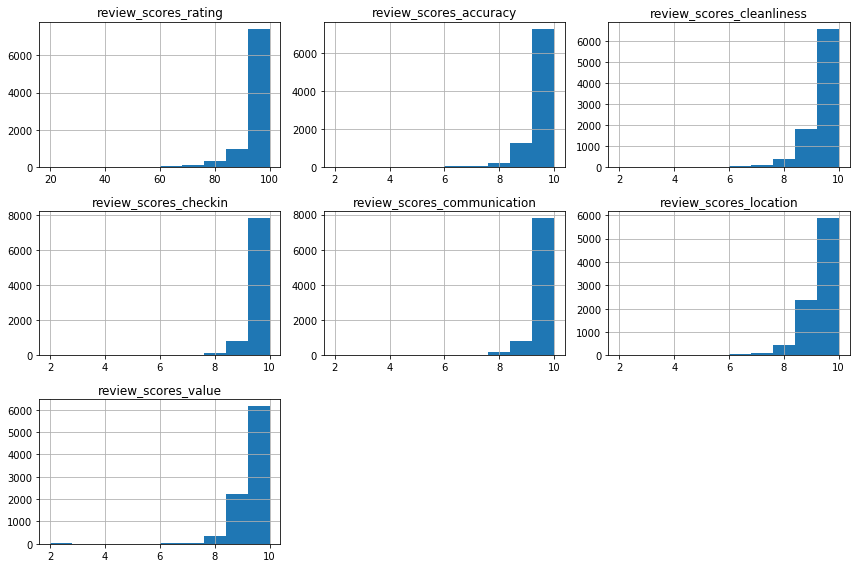

In [63]:
# Checking the distributions of the review ratings columns
variables_to_plot = list(df.columns[df.columns.str.startswith("review_scores") == True])
fig = plt.figure(figsize=(12,8))
for i, var_name in enumerate(variables_to_plot):
    ax = fig.add_subplot(3,3,i+1)
    df[var_name].hist(bins=10,ax=ax)
    ax.set_title(var_name)
fig.tight_layout()
plt.show()

In [64]:
variables_to_plot.pop(0)

'review_scores_rating'

In [65]:
# Binning for all columns scored out of 10
for col in variables_to_plot:
    bin_column(col,
               bins=[0, 8, 9, 10],
               labels=['0-8/10', '9/10', '10/10'],
               na_label='no reviews')

In [66]:
# Binning column scored out of 100
bin_column('review_scores_rating',
           bins=[0, 80, 95, 100],
           labels=['0-79/100', '80-94/100', '95-100/100'],
           na_label='no reviews')

In [67]:
df.cancellation_policy.value_counts()

strict_14_with_grace_period    4369
moderate                       3778
flexible                       3321
super_strict_60                  32
super_strict_30                  26
strict                           14
luxury_moderate                   1
Name: cancellation_policy, dtype: int64

In [68]:
# Replacing categories
df.cancellation_policy.replace({
    'super_strict_30': 'strict_14_with_grace_period',
    'super_strict_60': 'strict_14_with_grace_period',
    'strict': 'strict_14_with_grace_period',
    'luxury_moderate': 'moderate'
    }, inplace=True)

In [69]:
df.drop(['number_of_reviews_ltm', 'reviews_per_month'], axis=1, inplace=True)

/home/development-pc/anaconda3/lib/python3.7/site-packages/pandas/core/series.py:679: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


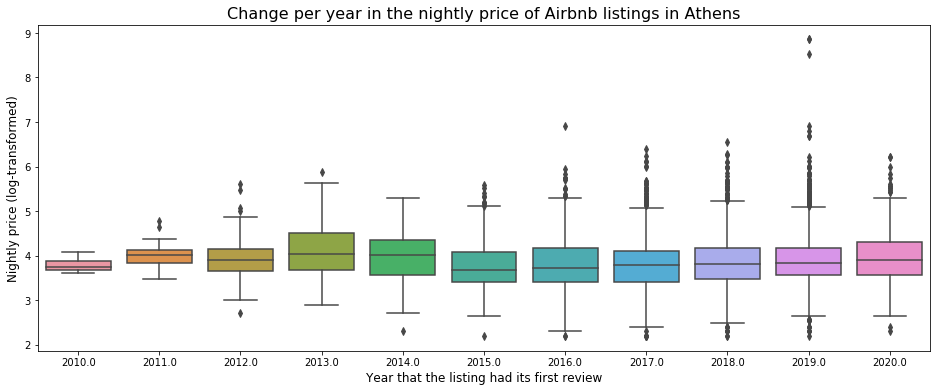

In [70]:
plt.figure(figsize=(16,6))
sns.boxplot(df.first_review.dt.year, np.log(df.price))
plt.xlabel('Year that the listing had its first review', fontsize=12)
plt.ylabel('Nightly price (log-transformed)', fontsize=12)
plt.title('Change per year in the nightly price of Airbnb listings in Athens', fontsize=16)
plt.show()

In [71]:
print("Mean nightly price of listings in each year on Airbnb in Athens:")
print(round(df.set_index('first_review').price.resample('YS').mean(),2))

Mean nightly price of listings in each year on Airbnb in Athens:
first_review
2010-01-01    45.20
2011-01-01    60.93
2012-01-01    59.90
2013-01-01    73.04
2014-01-01    63.80
2015-01-01    51.17
2016-01-01    55.53
2017-01-01    55.09
2018-01-01    56.15
2019-01-01    65.15
2020-01-01    63.80
Name: price, dtype: float64


In [72]:
df.drop(['host_since', 'first_review'], axis=1, inplace=True)

In [73]:
df.describe()

,host_is_superhost,host_listings_count,host_identity_verified,accommodates,bathrooms,bedrooms,beds,square_feet,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_90,number_of_reviews,instant_bookable,host_days_active,Cable TV,Coffee maker,Cooking basics,Dishes and silverware,Dishwasher,Dryer,Elevator,Essentials,Extra pillows and blankets,Family/kid friendly,First aid kit,Free street parking,Hair dryer,Heating,Host greets you,Hot water,Internet,Iron,Kitchen,Long term stays allowed,Microwave,Oven,Pets allowed,Private entrance,Private living room,Refrigerator,Smoking allowed,TV,Wifi
count,11541.000000,11541.000000,11541.000000,11541.000000,11541.000000,11541.000000,11541.000000,97.000000,11541.000000,11541.000000,11541.000000,11541.000000,11541.000000,11541.000000,1.154100e+04,11541.000000,11541.000000,11541.000000,11541.000000,11541.000000,11541.000000,11541.000000,11541.000000,11541.000000,11541.000000,11541.000000,11541.000000,11541.000000,11541.000000,11541.000000,11541.000000,11541.000000,11541.000000,11541.000000,11541.000000,11541.000000,11541.000000,11541.000000,11541.000000,11541.000000,11541.000000,11541.000000,11541.000000,11541.000000,11541.000000,11541.000000,11541.000000,11541.000000
mean,0.378390,18.081016,0.188718,3.976865,1.214713,1.416515,2.186812,679.164948,65.874101,63.864223,16.848367,1.931462,6.979984,3.628802,1.630069e+03,60.226497,35.892470,0.765272,887.567455,0.113508,0.612772,0.628195,0.662421,0.124339,0.152326,0.622216,0.960922,0.361234,0.322502,0.508795,0.451607,0.906940,0.841868,0.299108,0.722554,0.152413,0.845941,0.928776,0.422494,0.333940,0.508361,0.150680,0.272507,0.128065,0.688069,0.168010,0.868729,0.964388
std,0.485007,56.175945,0.391302,2.161199,0.519502,0.881586,1.633468,543.089785,150.484946,278.129286,16.952816,1.246304,8.678997,19.442075,9.309276e+04,31.188236,61.277227,0.423847,809.205992,0.317227,0.487138,0.483308,0.472905,0.329983,0.359353,0.484854,0.193789,0.480379,0.467454,0.499944,0.497674,0.290528,0.364880,0.457887,0.447758,0.359436,0.361021,0.257210,0.493978,0.471639,0.499952,0.357752,0.445268,0.334177,0.463302,0.373891,0.337711,0.185329
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000e+00,0.000000,0.000000,0.000000,-342.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000,269.000000,34.000000,0.000000,0.000000,1.000000,0.000000,1.000000,6.000000e+01,44.000000,1.000000,1.000000,231.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,0.000000,2.000000,0.000000,4.000000,1.000000,1.000000,2.000000,592.000000,48.000000,0.000000,17.000000,2.000000,6.000000,2.000000,1.125000e+03,72.000000,10.000000,1.000000,762.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000
75%,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,3.000000,1076.000000,70.000000,0.000000,25.000000,2.000000,10.000000,2.000000,1.125000e+03,87.000000,44.000000,1.000000,1386.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000
max,1.000000,1133.000000,1.000000,26

In [74]:
print(f"Nightly advertised prices range from €{min(df.price)} to €{max(df.price)}.")

Nightly advertised prices range from €0 to €7000.


In [1]:
plt.figure(figsize=(20,4))
df.price.hist(bins=100, range=(0,100))
plt.margins(x=0)
plt.axvline(200, color='orange', linestyle='--')
plt.title("Airbnb advertised nightly prices in Athens up to €100", fontsize=16)
plt.xlabel("Price (€)")
plt.ylabel("Number of listings")
plt.show()

NameError: name 'plt' is not defined

In [76]:
print("Median number of listings per host:", int(df.host_listings_count.median()))
print("Mean number of listings per host:", int(round(df.host_listings_count.mean())))
print(f"{int(round(100*len(df[df.host_listings_count == 1])/len(df)))}% of listings are from hosts with one listing.")

Median number of listings per host: 2
Mean number of listings per host: 18
31% of listings are from hosts with one listing.


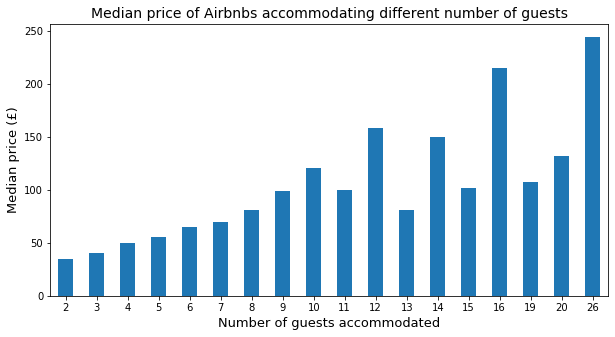

In [77]:
plt.figure(figsize=(10,5))
df.groupby('accommodates').price.median().plot(kind='bar')
plt.title('Median price of Airbnbs accommodating different number of guests', fontsize=14)
plt.xlabel('Number of guests accommodated', fontsize=13)
plt.ylabel('Median price (£)', fontsize=13)
plt.xticks(rotation=0)
plt.xlim(left=0.5)
plt.show()

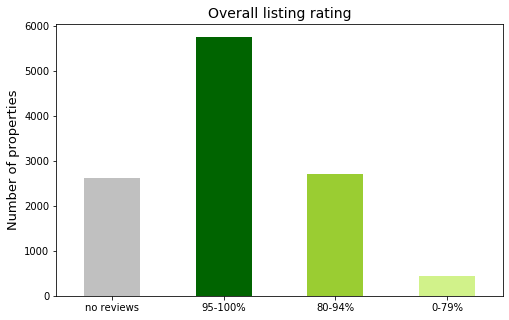

In [78]:
fig, ax = plt.subplots(1, 1, figsize=(8,5))
ax.set_title('Overall listing rating', fontsize=14)
df['review_scores_rating'].value_counts().sort_index(ascending=False).plot(kind='bar', color=['silver', 'darkgreen', 'yellowgreen', '#d1f28a' ], ax=ax)
ax.set_xticklabels(labels=['no reviews', '95-100%', '80-94%', '0-79%'], rotation=0)
ax.set_xlabel('')
ax.set_ylabel('Number of properties', fontsize=13)
plt.show()

In [79]:
def binary_count_and_price_plot(col, figsize=(8,3)):
    """
    Plots a simple bar chart of the counts of true and false categories in the column specified,
    next to a bar chart of the median price for each category.
    A figure size can optionally be specified.
    """
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle(col, fontsize=16, y=1)
    plt.subplots_adjust(top=0.80) # So that the suptitle does not overlap with the ax plot titles
    
    df.groupby(col).size().plot(kind='bar', ax=ax1, color=['firebrick', 'seagreen'])
    ax1.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax1.set_title('Category count')
    ax1.set_xlabel('')
    
    df.groupby(col).price.median().plot(kind='bar', ax=ax2, color=['firebrick', 'seagreen'])
    ax2.set_xticklabels(labels=['false', 'true'], rotation=0)
    ax2.set_title('Median price (€)')
    ax2.set_xlabel('')
    
    plt.show()

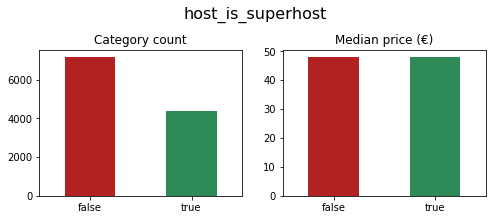

0    0.62161
1    0.37839
Name: host_is_superhost, dtype: float64


In [80]:
binary_count_and_price_plot('host_is_superhost')
print(df.host_is_superhost.value_counts(normalize=True))

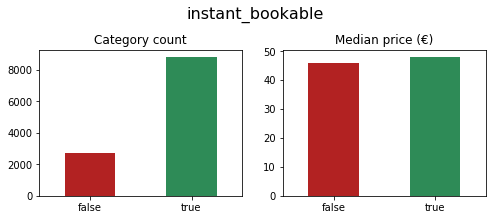

1    0.765272
0    0.234728
Name: instant_bookable, dtype: float64


In [81]:

binary_count_and_price_plot('instant_bookable')
print(df.instant_bookable.value_counts(normalize=True))

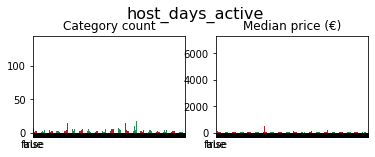

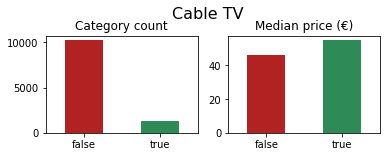

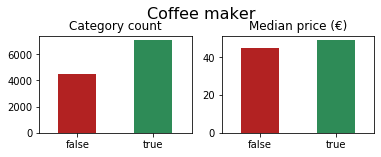

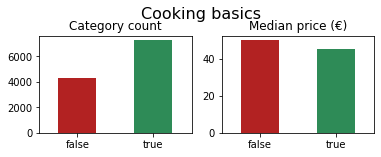

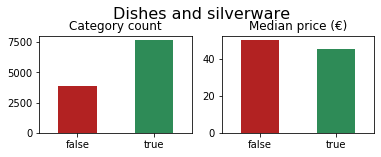

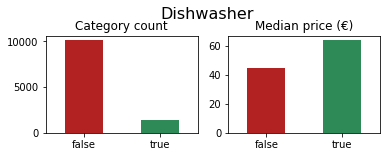

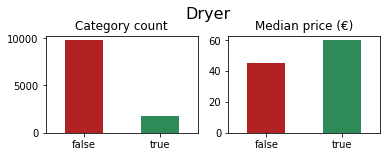

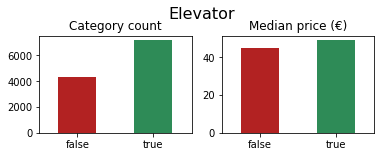

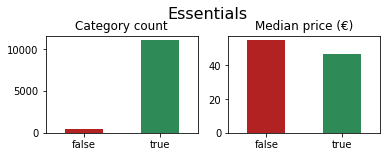

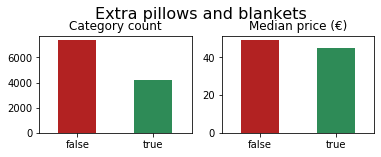

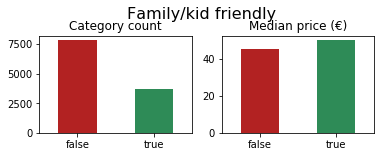

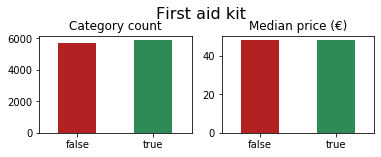

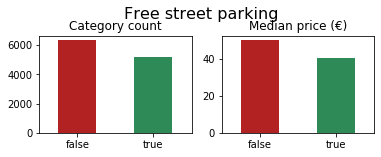

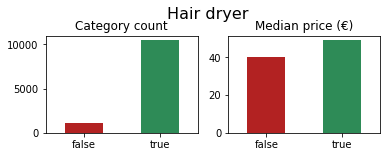

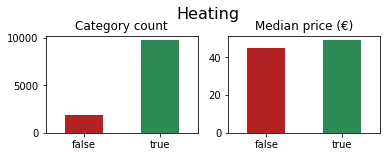

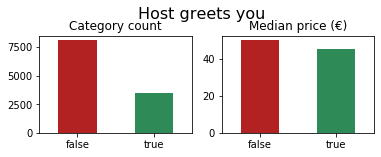

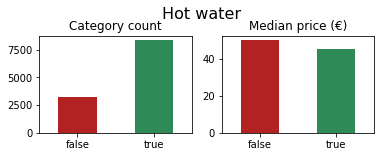

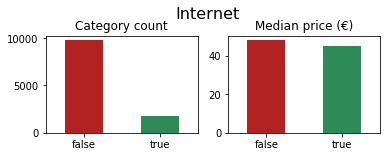

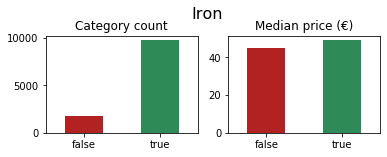

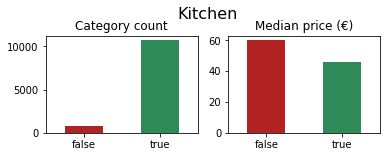

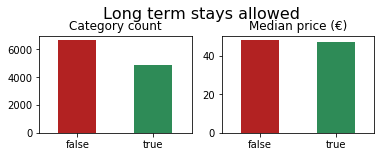

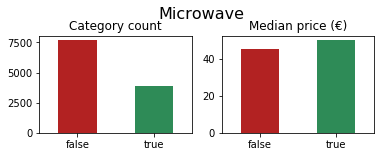

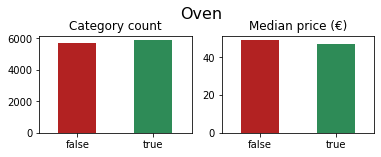

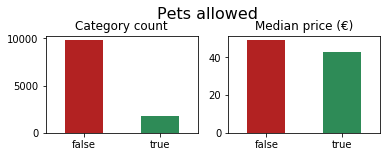

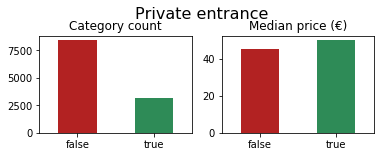

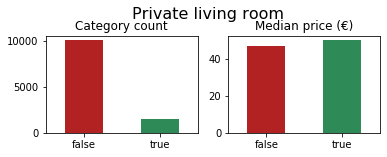

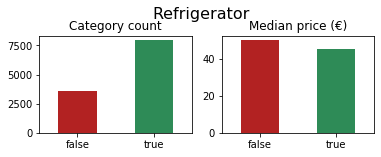

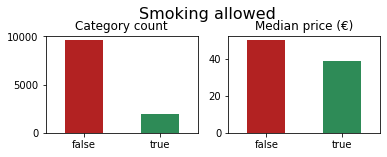

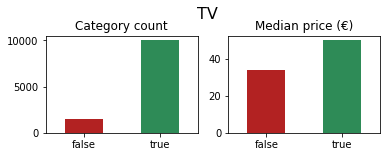

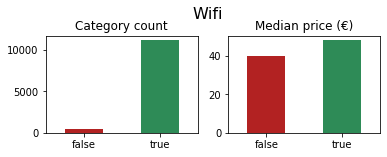

In [82]:
for col in df.iloc[:,31:-2].columns:
    binary_count_and_price_plot(col, figsize=(6,2))

In [83]:
transformed_df = pd.get_dummies(df)

In [84]:

def multi_collinearity_heatmap(df, figsize=(11,9)):
    
    """
    Creates a heatmap of correlations between features in the df. A figure size can optionally be set.
    """
    
    # Set the style of the visualization
    sns.set(style="white")

    # Create a covariance matrix
    corr = df.corr()

    # Generate a mask the size of our covariance matrix
    mask = np.zeros_like(corr, dtype=np.bool)
    mask[np.triu_indices_from(mask)] = True

    # Set up the matplotlib figure
    f, ax = plt.subplots(figsize=figsize)

    # Generate a custom diverging colormap
    cmap = sns.diverging_palette(220, 10, as_cmap=True)

    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5}, vmax=corr[corr != 1.0].max().max());

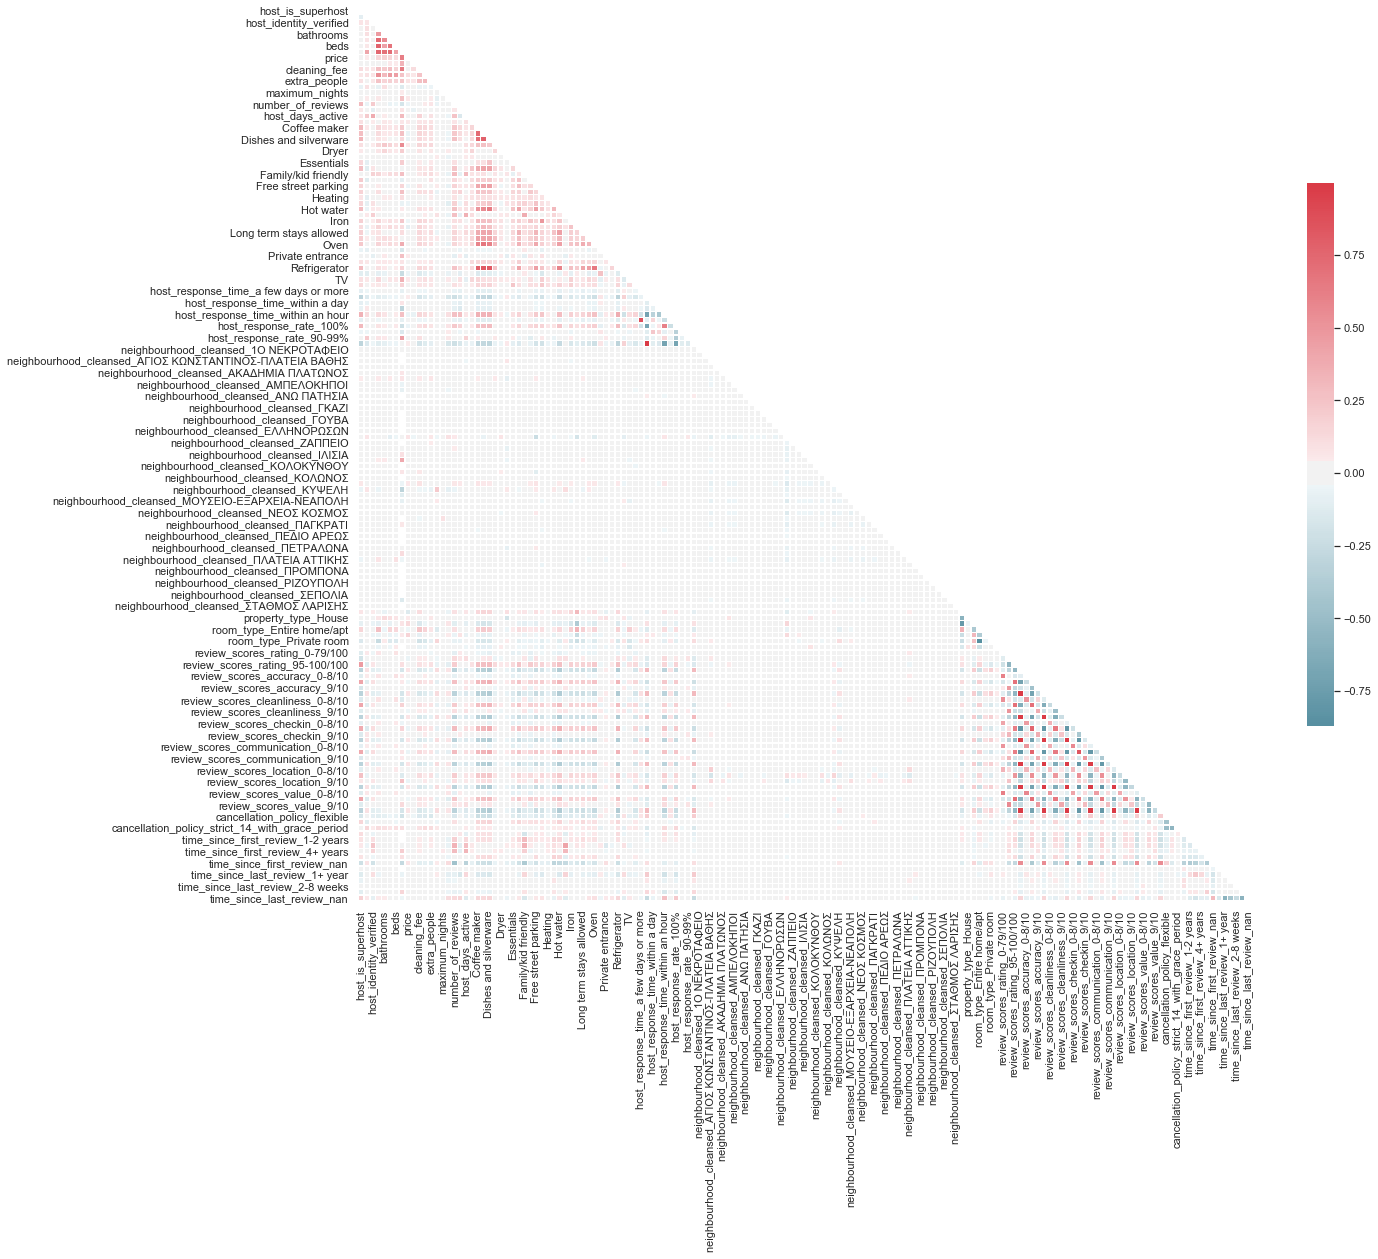

In [85]:
multi_collinearity_heatmap(transformed_df, figsize=(20,20))


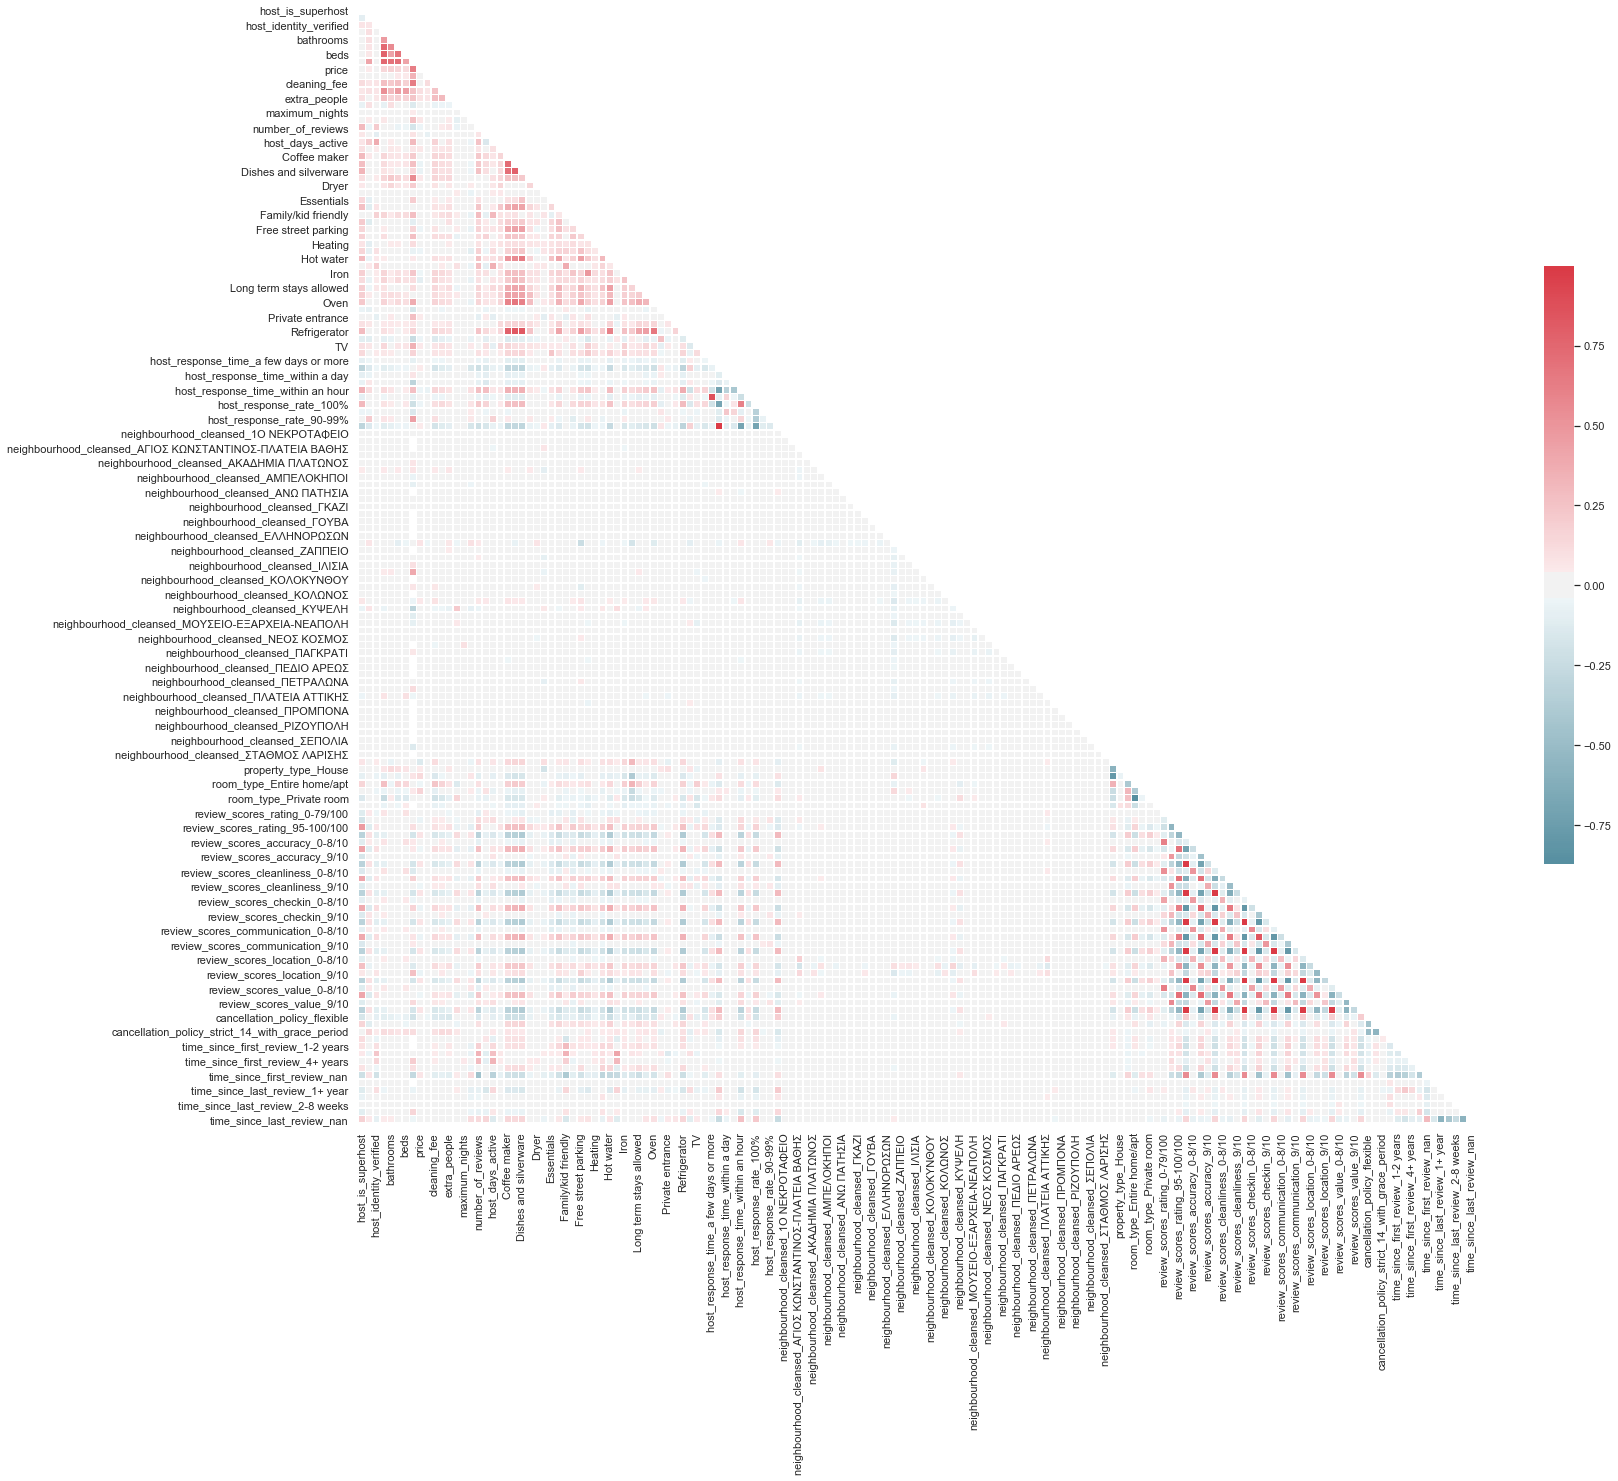

In [86]:
multi_collinearity_heatmap(transformed_df.drop(list(transformed_df.columns[transformed_df.columns.str.startswith('area')]), axis=1), figsize=(25,22))

In [87]:
# Dropping collinear features
to_drop = ['beds',
           'bedrooms',
           'guests_included', 
           'host_response_rate_unknown',
           'host_response_rate_0-49%',
           'property_type_Apartment',
           'room_type_Private room']
to_drop.extend(list(transformed_df.columns[transformed_df.columns.str.endswith('nan')]))

transformed_df.drop(to_drop, axis=1, inplace=True)

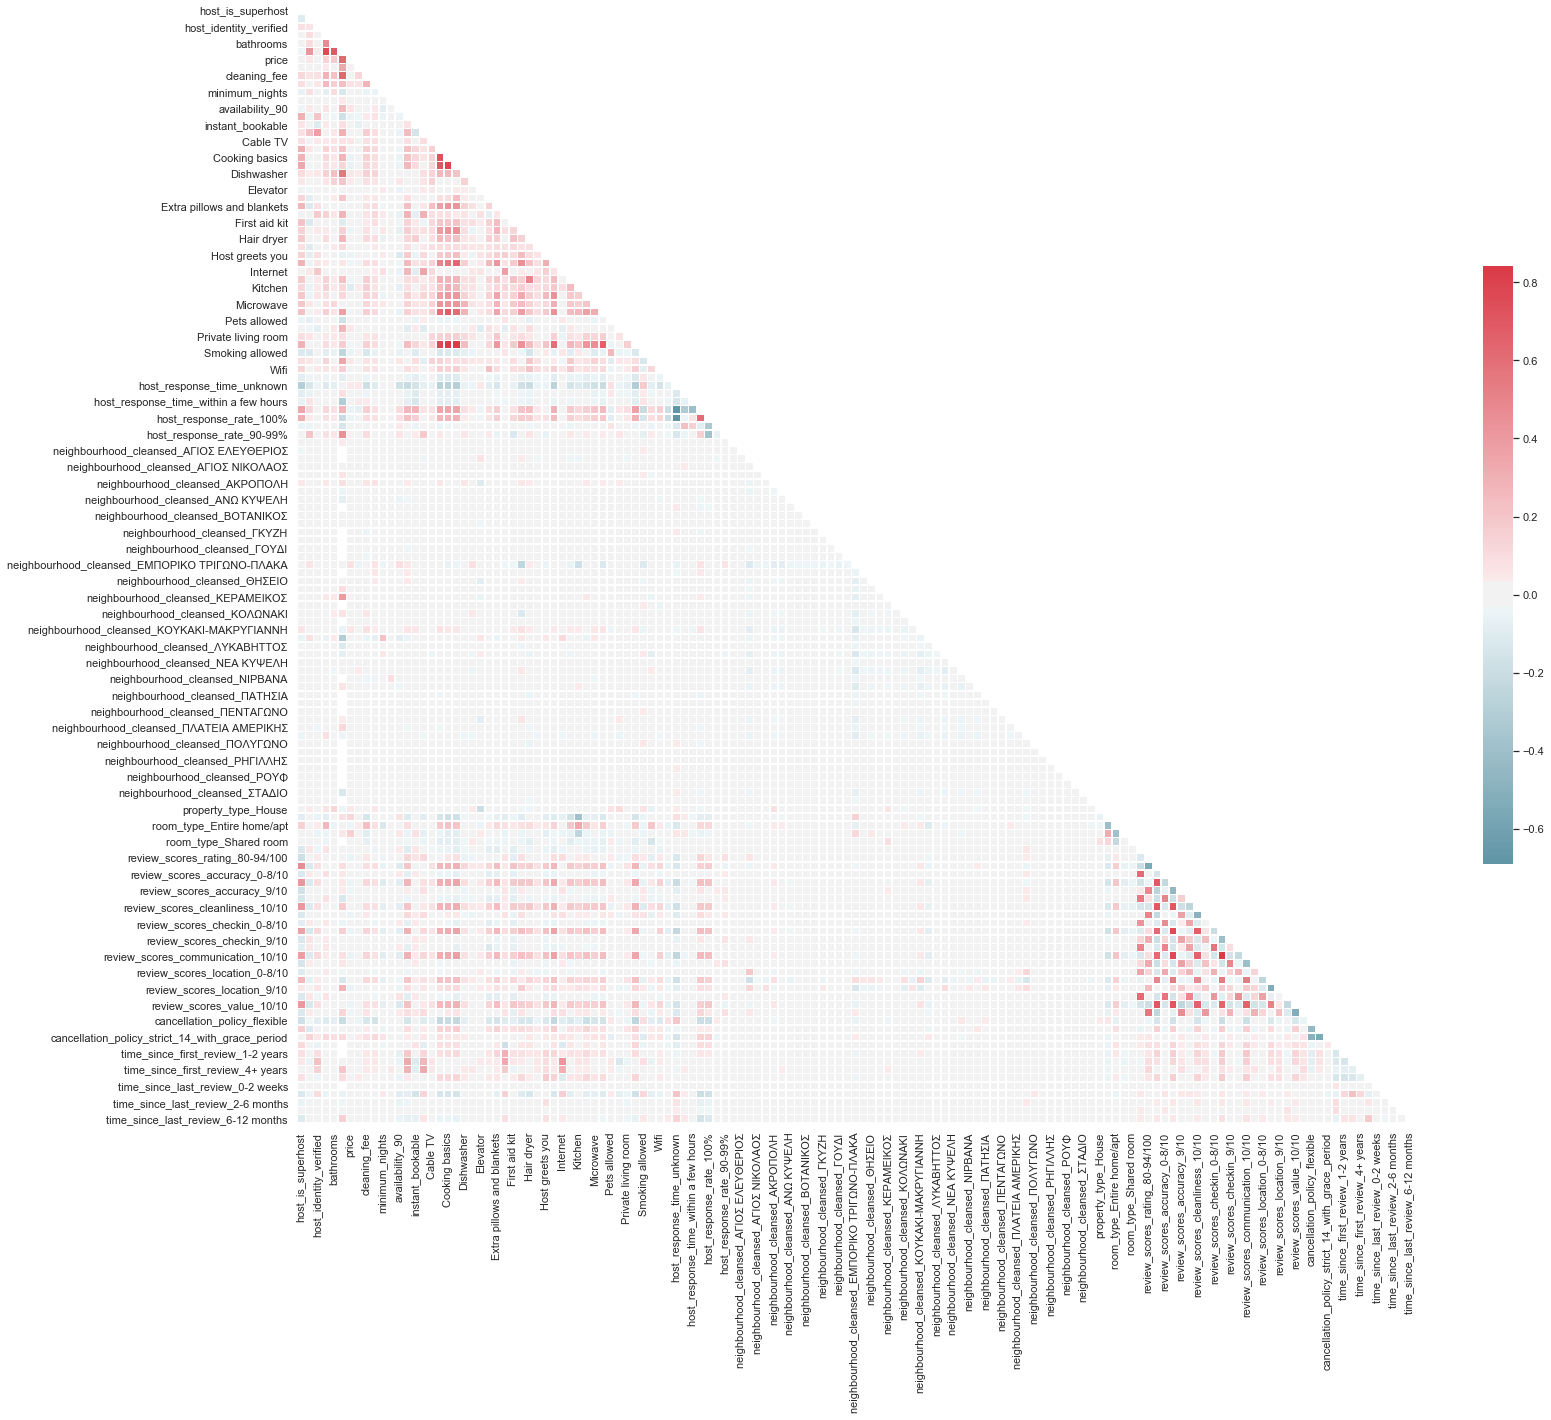

In [88]:
# Final assessment of multi-collinearity
multi_collinearity_heatmap(transformed_df.drop(list(transformed_df.columns[transformed_df.columns.str.startswith('area')]), axis=1), figsize=(25,22))

In [89]:
numerical_columns = ['accommodates', 'availability_90', 'bathrooms', 'cleaning_fee', 'extra_people', 'host_days_active', 'host_listings_count', 'maximum_nights', 'minimum_nights', 'number_of_reviews', 'price', 'security_deposit']

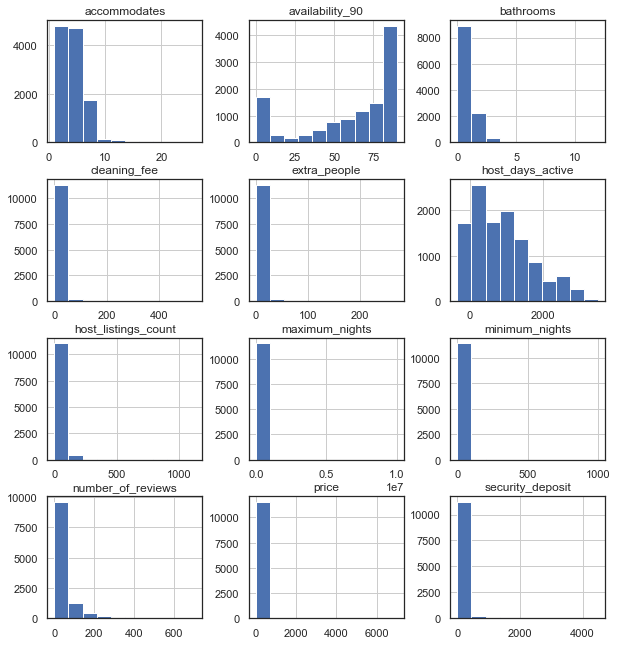

In [90]:
transformed_df[numerical_columns].hist(figsize=(10,11));

In [91]:
# Log transforming columns
numerical_columns = [i for i in numerical_columns if i not in ['availability_90', 'host_days_active']] # Removing items not to be transformed

for col in numerical_columns:
    transformed_df[col] = transformed_df[col].astype('float64').replace(0.0, 0.01) # Replacing 0s with 0.01
    transformed_df[col] = np.log(transformed_df[col])

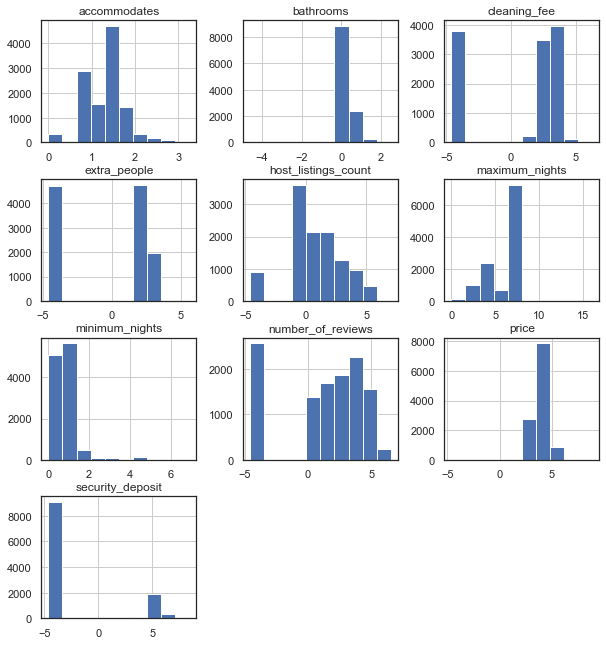

In [92]:
transformed_df[numerical_columns].hist(figsize=(10,11));

In [93]:
# Separating X and y
X = transformed_df.drop('price', axis=1)
y = transformed_df.price

# Scaling
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=list(X.columns))

In [94]:
# Splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [95]:
xgb_reg_start = time.time()

xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)
training_preds_xgb_reg = xgb_reg.predict(X_train)
val_preds_xgb_reg = xgb_reg.predict(X_test)

xgb_reg_end = time.time()

print(f"Time taken to run: {round((xgb_reg_end - xgb_reg_start)/60,1)} minutes")
print("\nTraining MSE:", round(mean_squared_error(y_train, training_preds_xgb_reg),4))
print("Validation MSE:", round(mean_squared_error(y_test, val_preds_xgb_reg),4))
print("\nTraining r2:", round(r2_score(y_train, training_preds_xgb_reg),4))
print("Validation r2:", round(r2_score(y_test, val_preds_xgb_reg),4))

Time taken to run: 0.0 minutes

Training MSE: 0.0435
Validation MSE: 0.1844

Training r2: 0.8933
Validation r2: 0.5928


In [96]:
ft_weights_xgb_reg = pd.DataFrame(xgb_reg.feature_importances_, columns=['weight'], index=X_train.columns)
ft_weights_xgb_reg.sort_values('weight', inplace=True)
ft_weights_xgb_reg

,weight
neighbourhood_cleansed_ΠΕΝΤΑΓΩΝΟ,0.000285
neighbourhood_cleansed_ΡΟΥΦ,0.000705
host_is_superhost,0.001059
square_feet,0.001208
review_scores_communication_10/10,0.001277
...,...
room_type_Entire home/apt,0.031697
bathrooms,0.034152
accommodates,0.036654
neighbourhood_cleansed_ΕΜΠΟΡΙΚΟ ΤΡΙΓΩΝΟ-ΠΛΑΚΑ,0.075627


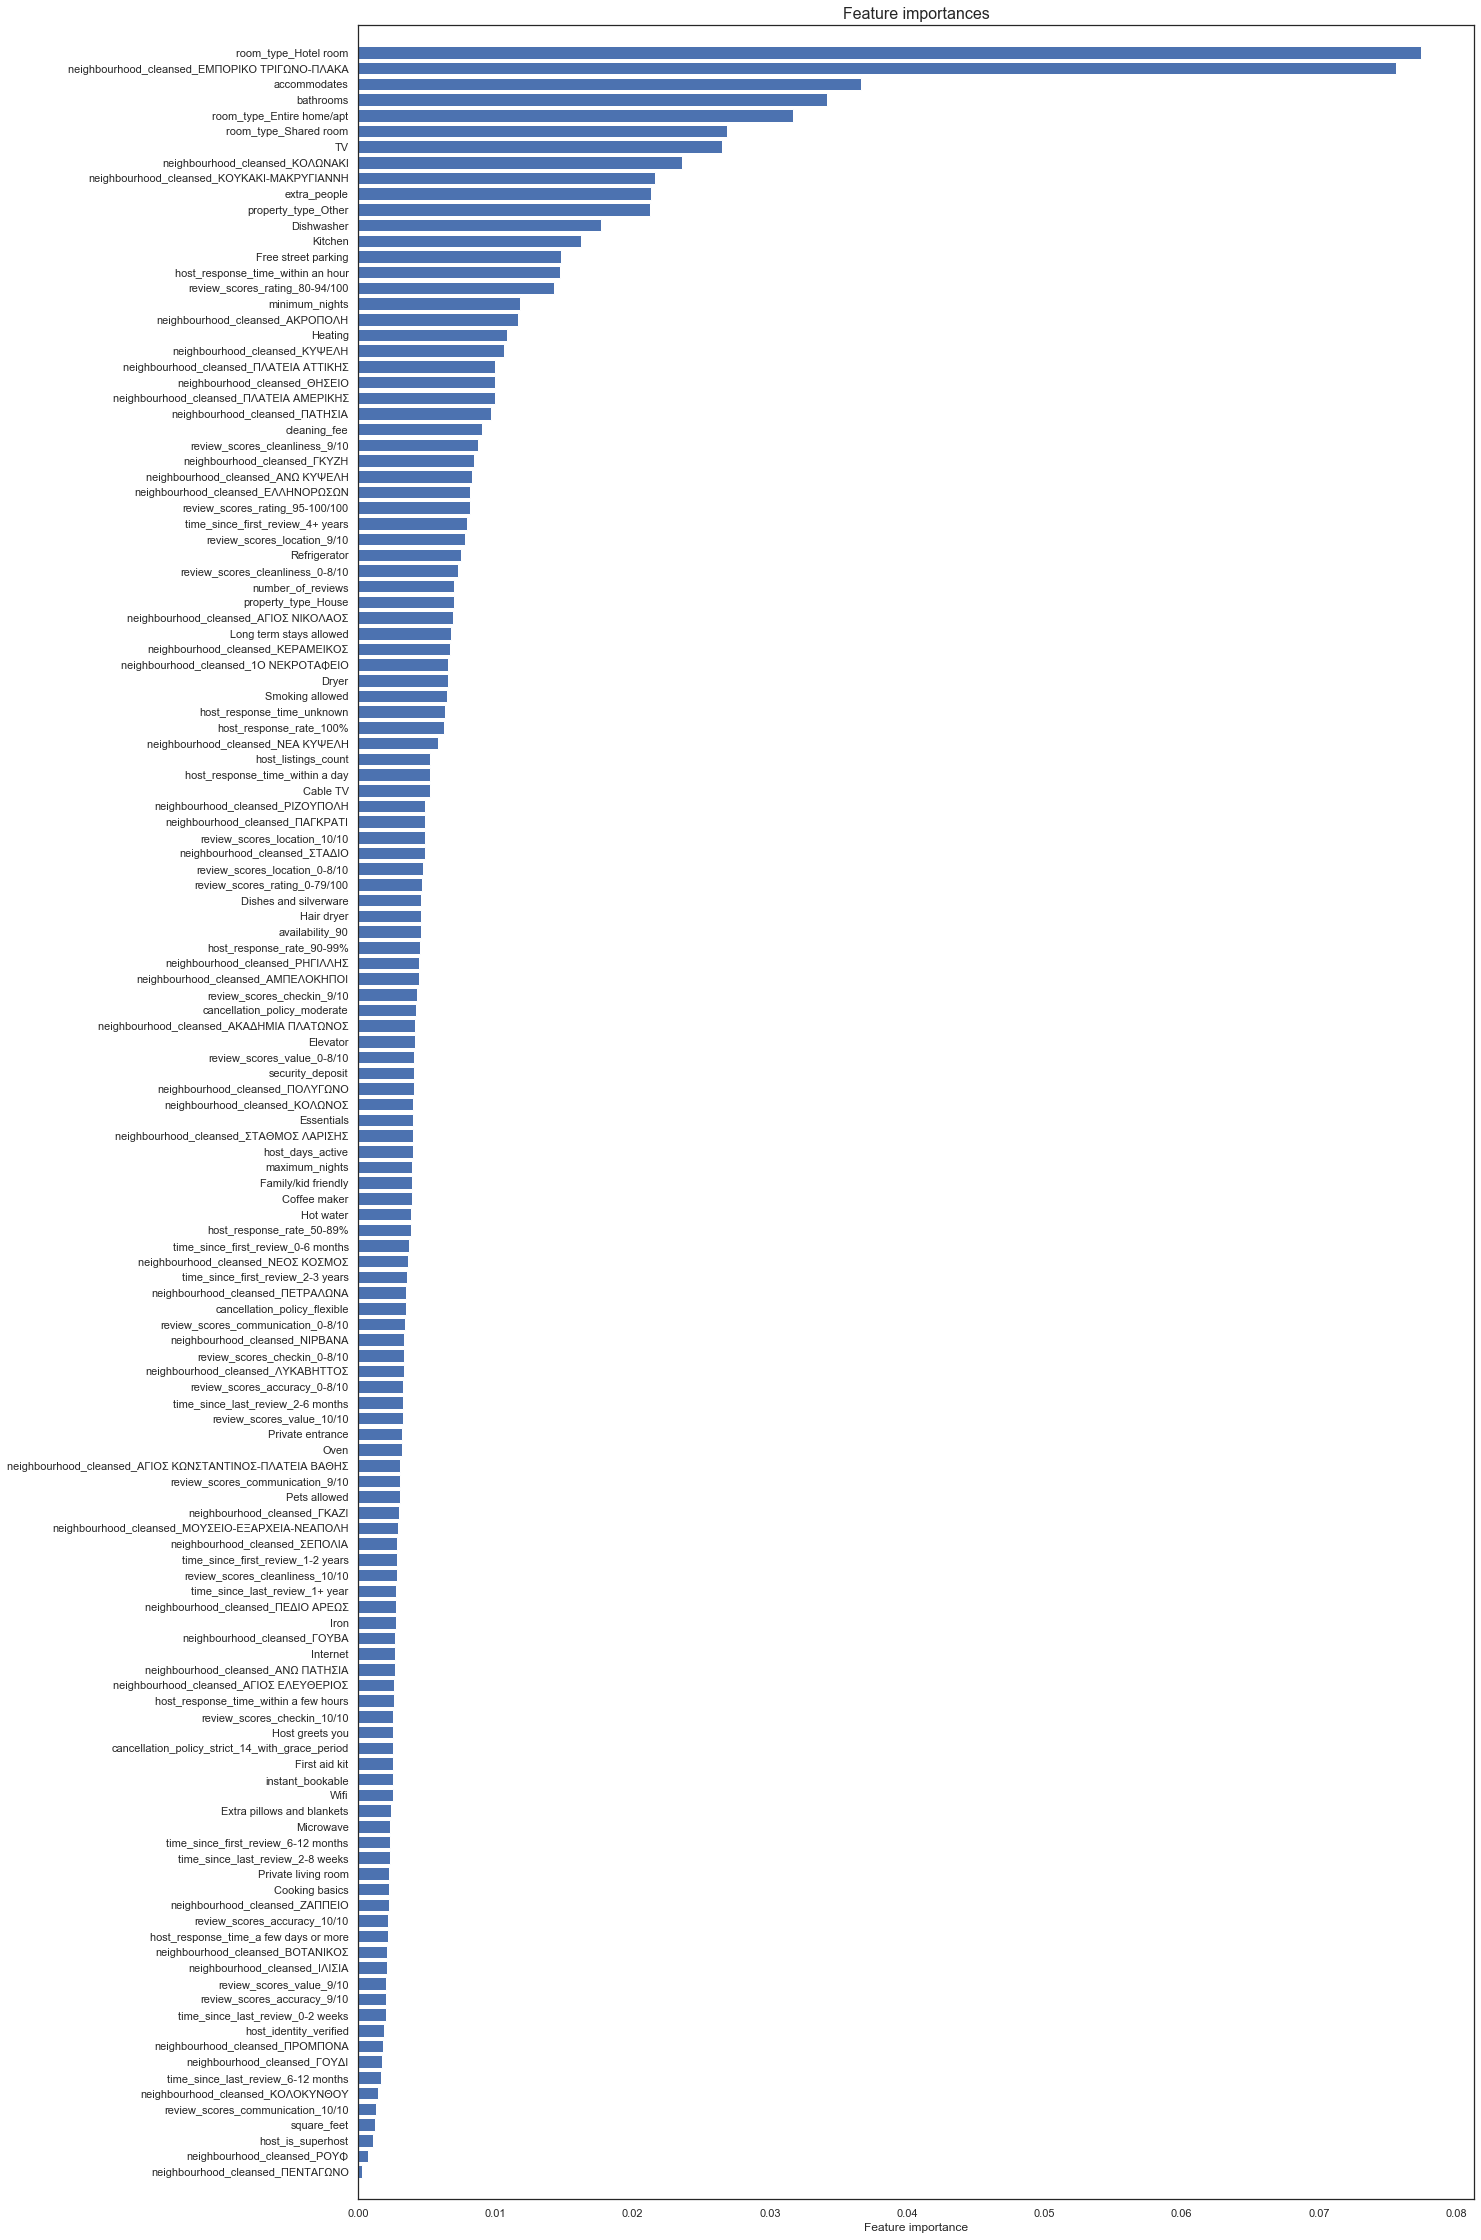

In [97]:
plt.figure(figsize=(20,40))
plt.barh(ft_weights_xgb_reg.index, ft_weights_xgb_reg.weight, align='center') 
plt.title("Feature importances", fontsize=16)
plt.xlabel("Feature importance")
plt.margins(y=0.01)
plt.show()

In [98]:
# Renaming the neighbourhood column
df.rename(columns={'neighbourhood_cleansed': 'borough'}, inplace=True)

# Importing the London borough boundary GeoJSON file as a dataframe in geopandas
map_df = gpd.read_file('/home/development-pc/Downloads/neighbourhoods.geojson')
map_df.head()

,neighbourhood,neighbourhood_group,geometry
0,1Ο ΝΕΚΡΟΤΑΦΕΙΟ,None,"MULTIPOLYGON (((23.74251 37.96321, 23.74250 37..."
1,ΑΓΙΟΣ ΕΛΕΥΘΕΡΙΟΣ,None,"MULTIPOLYGON (((23.73580 38.02347, 23.73345 38..."
2,ΑΓΙΟΣ ΚΩΝΣΤΑΝΤΙΝΟΣ-ΠΛΑΤΕΙΑ ΒΑΘΗΣ,None,"MULTIPOLYGON (((23.72923 37.98885, 23.72855 37..."
3,ΑΓΙΟΣ ΝΙΚΟΛΑΟΣ,None,"MULTIPOLYGON (((23.73376 38.00839, 23.73363 38..."
4,ΑΚΑΔΗΜΙΑ ΠΛΑΤΩΝΟΣ,None,"MULTIPOLYGON (((23.71199 37.99614, 23.71249 37..."


In [99]:
map_df.drop('neighbourhood_group', axis=1, inplace=True)

# Creating a dataframe of listing counts and median price by borough
borough_df = pd.DataFrame(df.groupby('borough').size())
borough_df.rename(columns={0: 'number_of_listings'}, inplace=True)
borough_df['median_price'] = df.groupby('borough').price.median().values

# Joining the dataframes
borough_map_df = map_df.set_index('neighbourhood').join(borough_df)

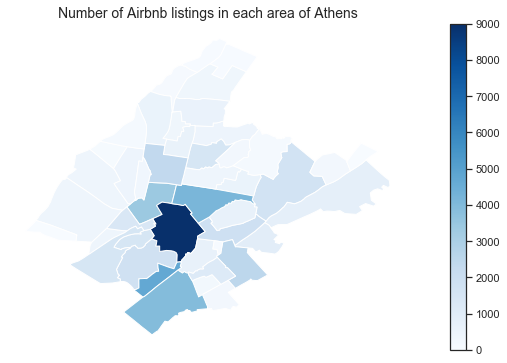

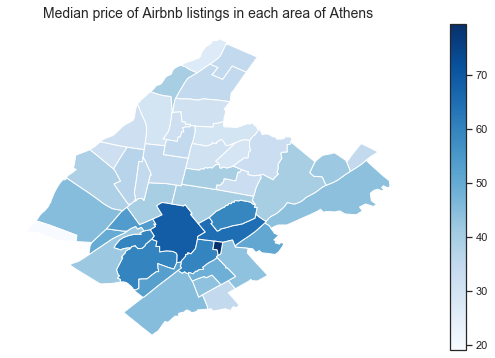

In [103]:
fig1, ax1 = plt.subplots(1, figsize=(15, 6))
borough_map_df.plot(column='number_of_listings', cmap='Blues', ax=ax1)
ax1.axis('off')
ax1.set_title('Number of Airbnb listings in each area of Athens', fontsize=14)
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=0, vmax=9000))
sm._A = [] # Creates an empty array for the data range
cbar = fig1.colorbar(sm)
plt.show()

# Plotting the median price of listings in each borough
fig2, ax2 = plt.subplots(1, figsize=(15, 6))
borough_map_df.plot(column='median_price', cmap='Blues', ax=ax2)
ax2.axis('off')
ax2.set_title('Median price of Airbnb listings in each area of Athens', fontsize=14)
sm = plt.cm.ScalarMappable(cmap='Blues', norm=plt.Normalize(vmin=min(borough_map_df.median_price), vmax=max(borough_map_df.median_price)))
sm._A = [] # Creates an empty array for the data range
cbar = fig2.colorbar(sm)
plt.show()

In [101]:
!pip install descartes